# 회귀 (Regression)

1. 목적: 연속적인 값(예: 가격, 온도, 시간 등)을 예측하는 것이 목적입니다.

2. 출력 유형: 실수 값(연속 값)을 출력합니다. 예를 들어, 집의 가격이나 자동차의 연비 등이 회귀 문제의 예시입니다.

3. 모델 예시: 선형 회귀, 다중 회귀, 릿지(Ridge) 및 라쏘(Lasso) 회귀, 다항 회귀, 서포트 벡터 머신 등.

4. 평가 방법: 평균 제곱 오차(Mean Squared Error, MSE), 평균 절대 오차(Mean Absolute Error, MAE), 결정 계수(R²) 등으로 평가합니다

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('./open/train.csv')

In [154]:
df

일시  최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합    일사합   일조율  평균기온
0      1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7    NaN   NaN  -1.6
1      1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0    NaN   NaN  -1.9
2      1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0    NaN   NaN   4.0
3      1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6    NaN   NaN   7.5
4      1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2    NaN   NaN  -4.6
...           ...   ...   ...   ...  ...   ...   ...  ...    ...   ...   ...
23006  2022-12-27   3.3  -7.3  10.6  NaN  69.8   1.8  8.8  10.25  91.7  -2.6
23007  2022-12-28   0.1  -6.0   6.1  0.1  58.1   2.5  8.7  10.86  90.6  -3.3
23008  2022-12-29   2.1  -7.8   9.9  0.0  56.3   1.7  9.0  10.88  93.8  -2.9
23009  2022-12-30   2.3  -4.4   6.7  0.0  65.6   1.9  7.9  10.84  82.3  -1.8
23010  2022-12-31   2.1  -5.1   7.2  0.0  65.5   1.4  1.1   4.16  11.5  -1.2

[23011 rows x 11 columns]

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [156]:
df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [157]:
df.describe()

최고기온          최저기온           일교차          강수량          평균습도  \
count  23008.000000  23008.000000  23007.000000  9150.000000  23011.000000   
mean      17.071714      8.451960      8.619277     9.593683     65.202851   
std       10.714471     10.578285      2.907096    21.966135     14.549077   
min      -13.600000    -20.200000      1.000000     0.000000     17.900000   
25%        7.800000     -0.300000      6.600000     0.100000     54.900000   
50%       18.900000      9.200000      8.600000     1.400000     65.500000   
75%       26.400000     17.900000     10.600000     8.500000     75.800000   
max       39.600000     30.300000     19.600000   332.800000     99.800000   

               평균풍속           일조합           일사합           일조율          평균기온  
count  23007.000000  22893.000000  18149.000000  22645.000000  23011.000000  
mean       2.380993      5.858826     11.933170     48.653526     12.415419  
std        0.947595      3.816941      6.419122     31.662321     10.489515  
min        0.100000      0.000000      0.000000      0.000000    -16.400000  
25%        1.700000      2.200000      7.000000     17.800000      3.400000  
50%        2.200000      6.600000     11.220000     55.700000     13.800000  
75%        2.900000      9.000000     16.620000     78.000000     21.800000  
max        7.800000     13.700000     33.480000     96.900000     33.700000

# 강수량 60%, 일사합 21% 결측치 존재

1. 결측치가 포함된 행을 제거할 것인가?

2. 결측치를 대체할 것 인가?

In [158]:
df_clean = df.dropna()

In [159]:
df_clean

일시  최고기온  최저기온  일교차   강수량  평균습도  평균풍속  일조합    일사합   일조율  평균기온
4749   1973-01-01   7.0  -1.2  8.2   2.9  75.0   3.0  2.4   4.81  25.0   3.2
4751   1973-01-03  -2.8 -11.3  8.5   0.0  66.3   1.4  2.8   6.16  28.9  -7.5
4754   1973-01-06   4.5  -2.8  7.3   1.2  75.5   2.0  1.9   5.23  19.6   0.6
4755   1973-01-07   2.0   0.4  1.6  11.2  96.3   2.6  0.0   1.92   0.0   0.8
4756   1973-01-08   4.4   0.0  4.4   0.0  83.8   2.4  6.4   8.74  66.0   1.3
...           ...   ...   ...  ...   ...   ...   ...  ...    ...   ...   ...
23000  2022-12-21   2.6  -2.6  5.2   3.6  82.4   2.7  0.0   2.48   0.0  -0.1
23007  2022-12-28   0.1  -6.0  6.1   0.1  58.1   2.5  8.7  10.86  90.6  -3.3
23008  2022-12-29   2.1  -7.8  9.9   0.0  56.3   1.7  9.0  10.88  93.8  -2.9
23009  2022-12-30   2.3  -4.4  6.7   0.0  65.6   1.9  7.9  10.84  82.3  -1.8
23010  2022-12-31   2.1  -5.1  7.2   0.0  65.5   1.4  1.1   4.16  11.5  -1.2

[7089 rows x 11 columns]

### 데이터의 손실이 너무 큼
23011 -> 7089

2. 결측치를 채우는 방향

1) 최고기온 3 : 전날과 비슷할 가능성이 높음 bfill

2) 최저기온 3 : 전날과 비슷할 가능성이 높음 bfill

3) 일교차 4 : 최고기온과 최저기온을 통해 계산가능

4) 강수량 13861 : 전날과 비슷할 가능성이 높음, 여름에는 강수 확률이 높을 것으로 예상

5) 평균습도 0

6) 평균풍속 4 : 전날과 비슷할 가능성이 높음, 평균값 대체 가능성

7) 일조합 118

8) 일사합 4862

9) 일조율 366

10) 평균기온 0

In [160]:
df['최고기온'].bfill(inplace=True)
df['최저기온'].bfill(inplace=True)

df['일교차'] = df['일교차'].fillna(df['최고기온'] - df['최저기온'])

C:\Users\hangil\AppData\Local\Temp\ipykernel_1668\2152935327.py:22: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_1668\2152935327.py:22: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_1668\2152935327.py:22: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_1668\2152935327.py:22: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_1668\2152935327.py:22: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_1668\2152935327.py:22: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:

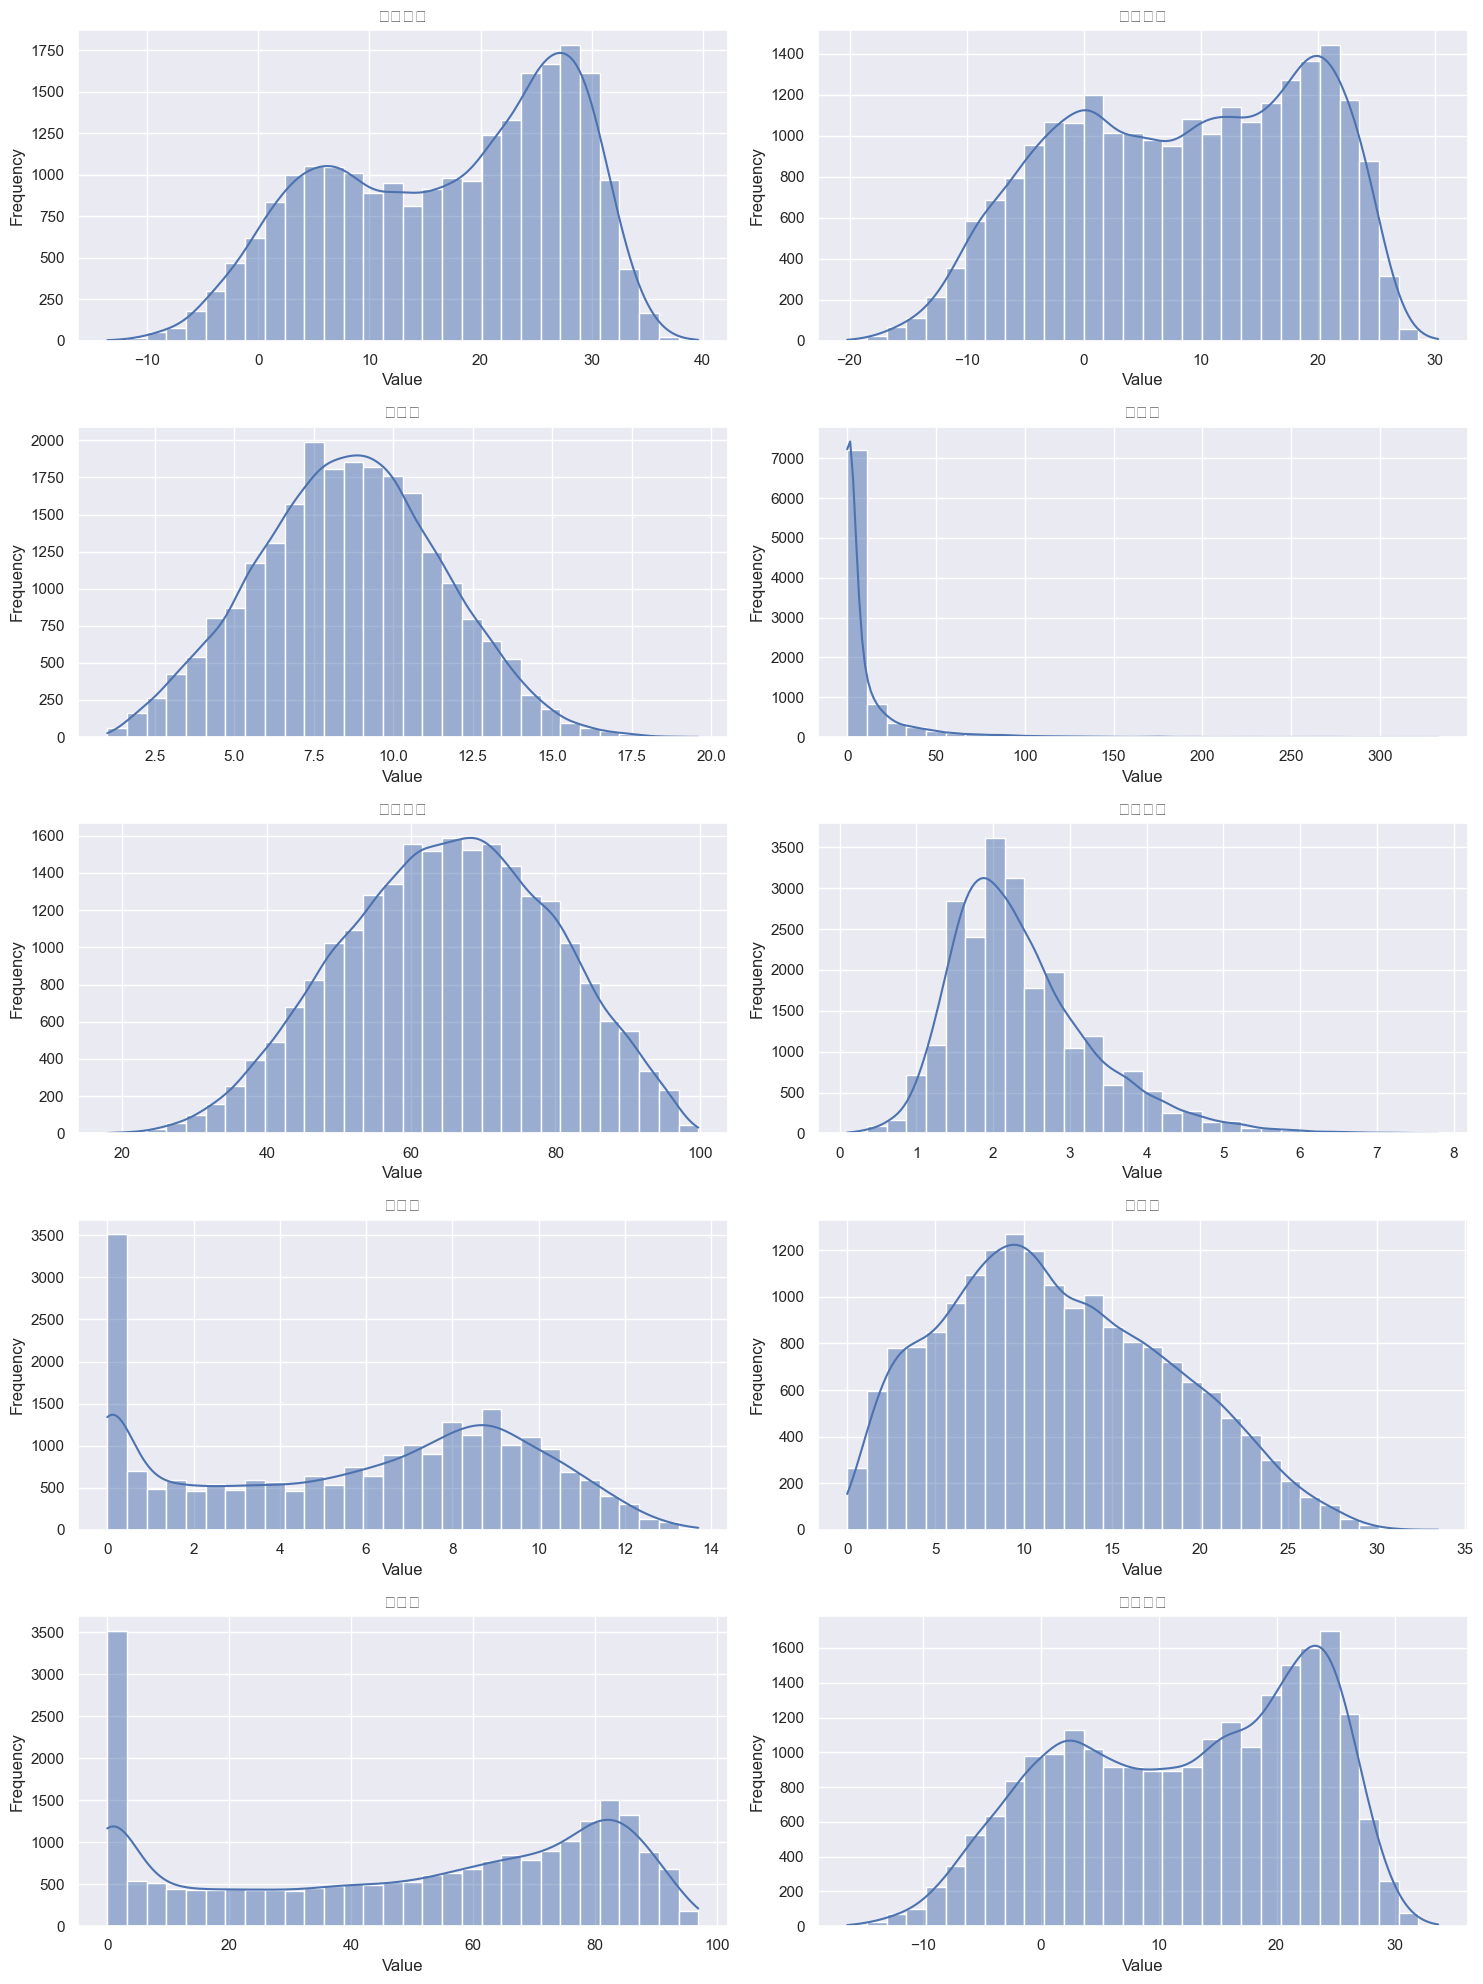

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns 세팅
sns.set()

# 서브플롯 생성
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# 컬럼
columns = ['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율', '평균기온']

# 컬럼 별로 시각화
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')

# 레이아웃
plt.tight_layout()

plt.show()


In [162]:
df['일시'] = pd.to_datetime(df['일시'])

In [163]:
df['Month'] = df['일시'].dt.month
df['Year'] = df['일시'].dt.year
df['Month'], df['Year']

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 23006    12
 23007    12
 23008    12
 23009    12
 23010    12
 Name: Month, Length: 23011, dtype: int32,
 0        1960
 1        1960
 2        1960
 3        1960
 4        1960
          ... 
 23006    2022
 23007    2022
 23008    2022
 23009    2022
 23010    2022
 Name: Year, Length: 23011, dtype: int32)

In [164]:
# 계절
def map_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'aut'
    else:
        return 'win'


df['계절'] = df['Month'].apply(map_season)


df[['일시', 'Month', '계절']].head()

일시  Month   계절
0 1960-01-01      1  win
1 1960-01-02      1  win
2 1960-01-03      1  win
3 1960-01-04      1  win
4 1960-01-05      1  win

C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE

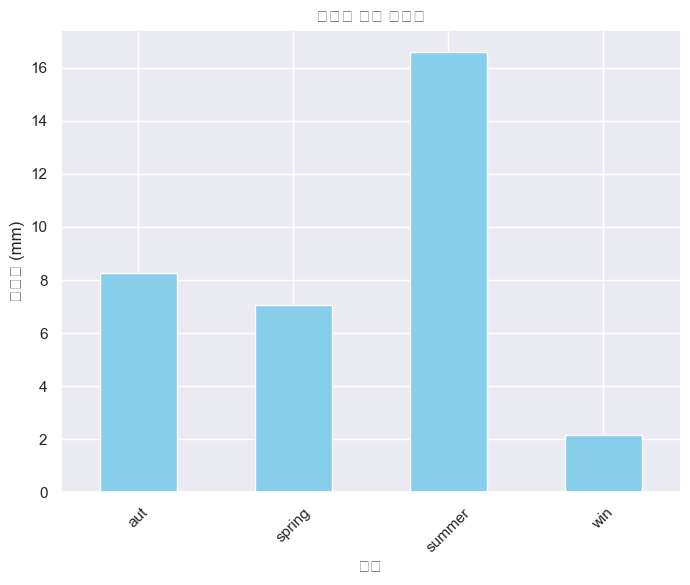

In [165]:
seasonal_precipitation = df.groupby('계절')['강수량'].mean()


plt.figure(figsize=(8, 6))
seasonal_precipitation.plot(kind='bar', color='skyblue')
plt.title('계절별 평균 강수량')
plt.xlabel('계절')
plt.ylabel('강수량 (mm)')
plt.xticks(rotation=45)
plt.show()

# 강수량 결측치 대체
1. 전날 값으로 대체
2. 계절의 평균, 중앙값

In [166]:
df['강수량'].bfill(inplace=True)

6) 평균풍속 4 : 전날과 비슷할 가능성이 높음, 평균값 대체 가능성

7) 일조합 118

8) 일사합 4862

9) 일조율 366

일조합 (Total Sunshine Duration): 일정 기간 동안 태양이 구름이나 다른 대기 현상에 가려지지 않고 지표에 직접 도달하는 총 시간을 나타냅니다. 이는 태양 광선이 얼마나 오랜 시간 동안 지표에 도달했는지를 보여주는 지표로, 농업, 태양 에너지 발전 등 다양한 분야에서 중요한 정보로 활용됩니다.

일사합 (Total Solar Radiation): 일정 기간 동안 지표에 도달한 태양 복사 에너지의 총량을 나타냅니다. 일사량은 일반적으로 메가줄(MJ) 단위로 측정되며, 태양 에너지의 강도와 지속 시간을 반영합니다. 이는 기후 연구, 태양 에너지 시스템 설계, 농업 기후 모델링 등에서 중요한 변수로 사용됩니다.

일조율 (Sunshine Percentage or Sunshine Duration Percentage): 가능한 최대 일조 시간 대비 실제 일조 시간의 비율을 나타냅니다. 예를 들어, 하루 중 태양이 빛날 수 있는 최대 시간이 10시간이고, 실제 일조 시간이 5시간이라면 일조율은 50%가 됩니다. 이 지표는 기후 패턴, 관광 계획, 농작물 성장 조건 등의 분석에 유용합니다.


In [167]:
df['평균풍속'].bfill(inplace=True)

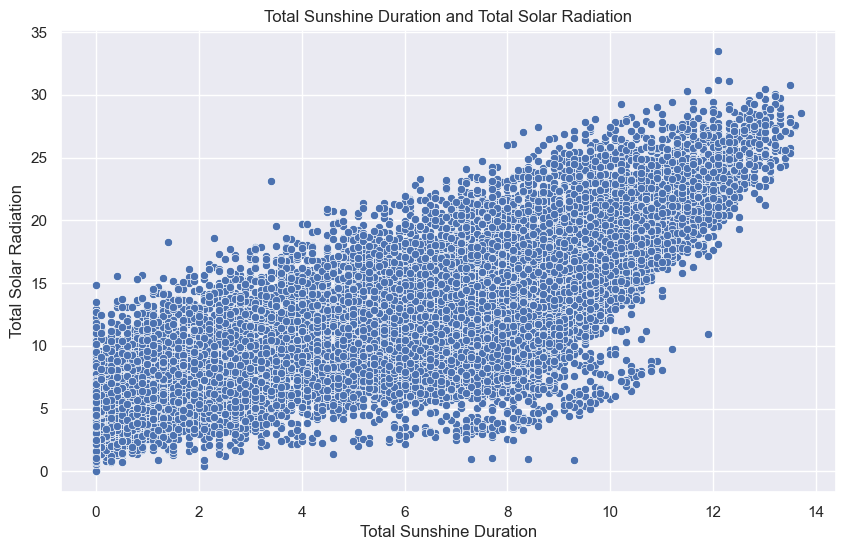

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='일조합', y='일사합')
plt.title('Total Sunshine Duration and Total Solar Radiation')
plt.xlabel('Total Sunshine Duration')
plt.ylabel('Total Solar Radiation')
plt.show()

c:\Users\hangil\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.draw()
c:\Users\hangil\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.draw()
c:\Users\hangil\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
c:\Users\hangil\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
c:\Users\hangil\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.draw()
c:\Users\hangil\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
c:\Users\hangil\anaconda3\

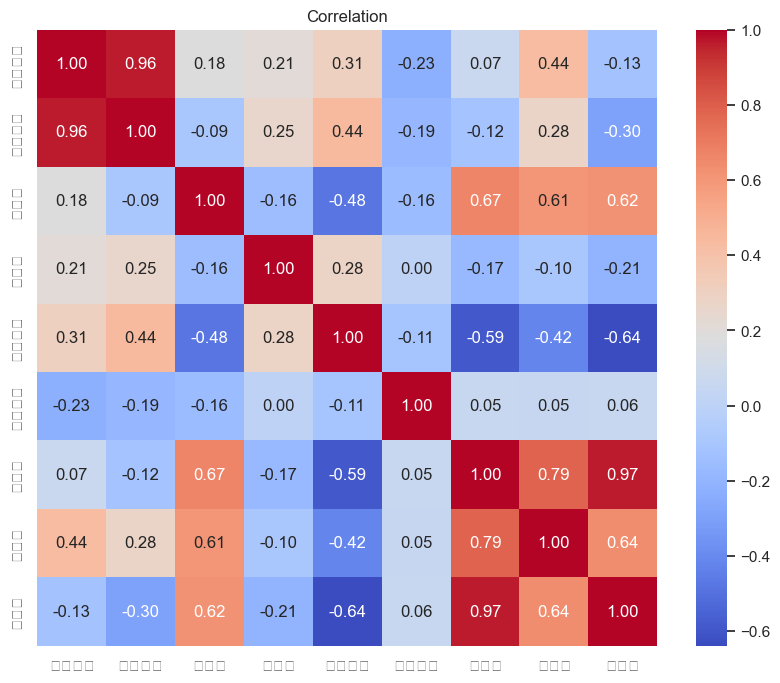

In [169]:
cols = ['최고기온','최저기온','일교차','강수량','평균습도','평균풍속','일조합','일사합','일조율']
df_corr = df[cols].corr()

# 상관관계 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation")
plt.show()

In [170]:
df['일조합'].bfill(inplace=True)

# 일조합을 통해 일사합과 일조율 값을 예상 후 대체

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data_lr = df.dropna(subset=['일조합', '일사합'])


X = data_lr[['일조합']]
y = data_lr['일사합'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse

4.009195435865536

In [172]:

missing_solar_radiation = df['일사합'].isnull() & df['일조합'].notnull()
df.loc[missing_solar_radiation, '일사합'] = model.predict(df.loc[missing_solar_radiation, ['일조합']])


missing_values = df['일사합'].isnull().sum()
missing_values

0

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data_lr = df.dropna(subset=['일조합', '일조율'])


X = data_lr[['일조합']]
y = data_lr['일조율'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse

8.919913258726021

In [174]:

missing_solar_radiation = df['일조율'].isnull() & df['일조합'].notnull()
df.loc[missing_solar_radiation, '일조율'] = model.predict(df.loc[missing_solar_radiation, ['일조합']])


missing_values = df['일조율'].isnull().sum()
missing_values

0

In [175]:
df.isnull().sum()

일시       0
최고기온     0
최저기온     0
일교차      0
강수량      0
평균습도     0
평균풍속     0
일조합      0
일사합      0
일조율      0
평균기온     0
Month    0
Year     0
계절       0
dtype: int64

# 모델링

In [176]:
from sklearn.model_selection import train_test_split

X = df[['최고기온','최저기온','일교차','강수량','평균습도','평균풍속','일조합','일사합','일조율']]

y = df['평균기온']

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=17)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18408, 9), (4603, 9), (18408,), (4603,))

In [177]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 파이프라인 생성
lr_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])

# 파이프라인을 사용하여 모델 학습
lr_pipeline.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_pred = lr_pipeline.predict(X_test)
pipeline_mae = mean_absolute_error(y_test, y_pred)

pipeline_mae



0.38261283561247417

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 파이프라인 생성
rf_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor(n_estimators = 90,
                                        random_state=17))
])

# 파이프라인을 사용하여 모델 학습
rf_pipeline.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_pred = rf_pipeline.predict(X_test)
pipeline_mae = mean_absolute_error(y_test, y_pred)

pipeline_mae

0.38126463417577905

In [198]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# 파이프라인 생성
xgb_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', XGBRegressor(learning_rate = 0.1,
                               n_estimators = 90,
                                random_state=17))
])

# 파이프라인을 사용하여 모델 학습
xgb_pipeline.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_pred = xgb_pipeline.predict(X_test)
pipeline_mae = mean_absolute_error(y_test, y_pred)

pipeline_mae

0.37410886048672337

In [202]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

# 파이프라인 생성
LGB_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LGBMRegressor(learning_rate = 0.1,
                               n_estimators = 100,
                                random_state=17))
])

# 파이프라인을 사용하여 모델 학습
LGB_pipeline.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_pred = LGB_pipeline.predict(X_test)
pipeline_mae = mean_absolute_error(y_test, y_pred)

pipeline_mae

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1908
[LightGBM] [Info] Number of data points in the train set: 18408, number of used features: 9
[LightGBM] [Info] Start training from score 12.379813


0.3729365306234175

In [222]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

# 파이프라인 생성
cat_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', CatBoostRegressor(iterations = 2000,
                                    early_stopping_rounds = 5,
                                    learning_rate = 0.01,
                                    eval_metric = 'MAE',
                                    depth = 10,
                                random_state=17))
])

# 파이프라인을 사용하여 모델 학습
cat_pipeline.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_pred = cat_pipeline.predict(X_test)
pipeline_mae = mean_absolute_error(y_test, y_pred)

pipeline_mae

0:	learn: 9.0160225	total: 28.2ms	remaining: 56.3s
1:	learn: 8.9289177	total: 55.6ms	remaining: 55.5s
2:	learn: 8.8416640	total: 81.5ms	remaining: 54.2s
3:	learn: 8.7570413	total: 110ms	remaining: 55.1s
4:	learn: 8.6729164	total: 136ms	remaining: 54.4s
5:	learn: 8.5879250	total: 163ms	remaining: 54.3s
6:	learn: 8.5069939	total: 191ms	remaining: 54.5s
7:	learn: 8.4265337	total: 220ms	remaining: 54.8s
8:	learn: 8.3456700	total: 253ms	remaining: 56s
9:	learn: 8.2640694	total: 283ms	remaining: 56.2s
10:	learn: 8.1843860	total: 310ms	remaining: 56.1s
11:	learn: 8.1054515	total: 336ms	remaining: 55.7s
12:	learn: 8.0267460	total: 362ms	remaining: 55.4s
13:	learn: 7.9477522	total: 387ms	remaining: 54.9s
14:	learn: 7.8716848	total: 412ms	remaining: 54.6s
15:	learn: 7.7966900	total: 436ms	remaining: 54.1s
16:	learn: 7.7213259	total: 462ms	remaining: 53.8s
17:	learn: 7.6456525	total: 490ms	remaining: 54s
18:	learn: 7.5705290	total: 518ms	remaining: 54s
19:	learn: 7.4964054	total: 546ms	remaining:

0.36327995778664623